In [1]:
import numpy as np
from numpy import poly1d as p, polyint
from scipy.linalg import eigh
np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight', './00_mplrc'])
from matplotlib import rcParams
l_colors = rcParams['axes.color_cycle']

from IPython.display import HTML, Latex, display
HTML(open("00_custom.css","r").read())

# 3 DOF System

<img src="bending.svg" style="width:100%">

In the figure above

<ol type='a'>
 <li> the system under investigation, with the two supported masses and
      the dynamical degrees of freedom that describe the system deformation
      (top left);
 <li> the three diagrams of bending moment (in red positive bending moments,
      in blue negative ones) that derive from application of external unit
      forces, corresponding to each of the three degrees of freedom.
</ol>

The same bending moments are represented in the following data structure in terms of polynomials of first degree `p((linear_coefficient, constant_coefficient))`, each row corresponding to a load condition while the terms in each row are corresponding, the first 4 to the segments on length `L` on the horizontal part, from left to right (1,2,3) and from rigth to left (4), the fifth is corresponding to the vertical part, from top to bottom.

In [2]:
bm = [[p(( 1, 0)), p(( 1, 1)), p(( 1, 2)), p(( 3, 0)), p(( 0, 0))],
      [p(( 0, 0)), p(( 0, 0)), p(( 1, 0)), p(( 1, 0)), p(( 0, 0))],
      [p(( 0, 0)), p(( 0,-1)), p(( 0,-1)), p((-1, 0)), p((-1, 0))]]

To compute the flexibilities we sum the integrals of the products of bending moments  on each of the five spans of unit length that we are using and place the results in a 2D data structure that is eventually converted to a matrix by `np.mat`.

In [3]:
F = np.mat([[sum(polyint(bm0[i]*bm1[i])(1) for i in range(5))
              for bm1 in bm] for bm0 in bm])

print('F = 1/6 * L^3/EJ *')
print(F*6)

F = 1/6 * L^3/EJ *
[[ 72.  14. -30.]
 [ 14.   4.  -5.]
 [-30.  -5.  16.]]


we invert the flexibility matrix to obtain the stiffness matrix

In [4]:
K = F.I
print('K = 3/136 * EJ/L^3 *')
print(K*136/3)

K = 3/136 * EJ/L^3 *
[[  39.  -74.   50.]
 [ -74.  252.  -60.]
 [  50.  -60.   92.]]


and eventually we define the mass matrix

In [5]:
M = np.mat(np.eye(3)) ; M[2,2]=2
print('M = m *')
print (M)

M = m *
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  2.]]


In [6]:
evals, evecs = eigh(K,M)
print("Eigenvalues, w_0^2 *", evals)
for i in range(3):
    if evecs[0,i]<0: evecs[:,i]*=-1
print("Matrix of mass normalized eigenvectors,")
print(evecs)

Eigenvalues, w_0^2 * [ 0.05916788  1.06327173  6.31138392]
Matrix of mass normalized eigenvectors,
[[ 0.83520734  0.45567642  0.30787609]
 [ 0.15827504  0.3369755  -0.9281145 ]
 [-0.37240952  0.58258326  0.14801316]]


## The Load

The load is $F_0\,\boldsymbol{r}\,f(t)$ with $F_0 = \delta EJ/L^3$,  $\boldsymbol{r}=\begin{Bmatrix}1&0&0\end{Bmatrix}^T$ and
$f(t) = 2\sin^2(\omega_0t/2)=1-\cos(\omega_0t)$ for $0\le \omega_0 t\le 2\pi$ while $f(t)=0$ otherwise.

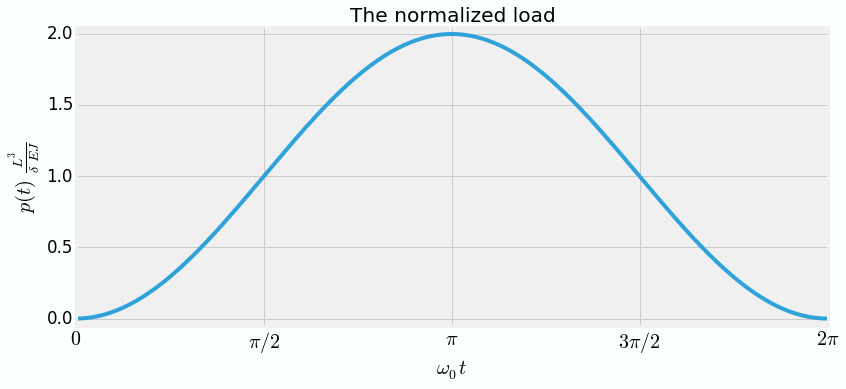

In [7]:
pi = np.pi
t1 = np.linspace(0,2*pi,601)

plt.plot(t1,1-np.cos(t1))

plt.xlabel(r'$\omega_0t$', size=20)
plt.ylabel(r'$p(t)\,\frac{L^3}{\delta\,EJ}$', size=20)

plt.xlim((0,2*pi))
plt.ylim((-0.05,2.05))

plt.xticks((0,pi/2,pi,pi*1.5,2*pi),
           (r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'), fontsize=20)

plt.title('The normalized load')
plt.show()

## The Particular Integrals

For our load, each modal equation of motion can be written as

\begin{align}
  m \ddot q_i + m \Lambda_i^2\omega_0^2 q_i &=
    \delta\frac{EJ}{L^3}\boldsymbol\psi_i^T\boldsymbol{r}\,
    (1-\cos(\omega_0t))\Rightarrow\\
    \ddot q_i + \Lambda_i^2\omega_0^2 q_i &= G_i \delta\omega_0^2 \,
    (1-\cos(\omega_0t)) 
\end{align}

with $G_i = \boldsymbol\psi_i^T\boldsymbol{r}.$

With $\xi_i = C_i + D_i \cos(\omega_0 t)$, substituting in the equation of motion and considering separately the constant terms and the cosine terms, with appropriate simplifications we have

\begin{align}
    \Lambda_i^2\,C_i &= +G_i \, \delta\\
    (\Lambda_i^2-1) \, D_i &= -G_i\,\delta
\end{align}

and consequently

$$ C_i = +\delta\,\frac{\boldsymbol\psi_i^T\boldsymbol{r}}{\Lambda^2_i},\qquad
   D_i = -\delta\,\frac{\boldsymbol\psi_i^T\boldsymbol{r}}{\Lambda^2_i-1}.$$

In [10]:
r = np.array((1,0,0))
w = np.sqrt(evals)
C = np.dot(evecs.T,r)/evals
D = np.dot(evecs.T,r)/(1-evals)
display(Latex(r'\begin{align}' +
              r'\\'.join(r"""
              \frac{\xi_%d(t)}\delta &= %+g %+g \cos(\omega_0 t),
              && \text{for } 0 \le \omega_0 t \le 2\pi.
              """ % (i+1,C[i],D[i]) for i in range(3)) +
              r'\end{align}'))

<IPython.core.display.Latex object>

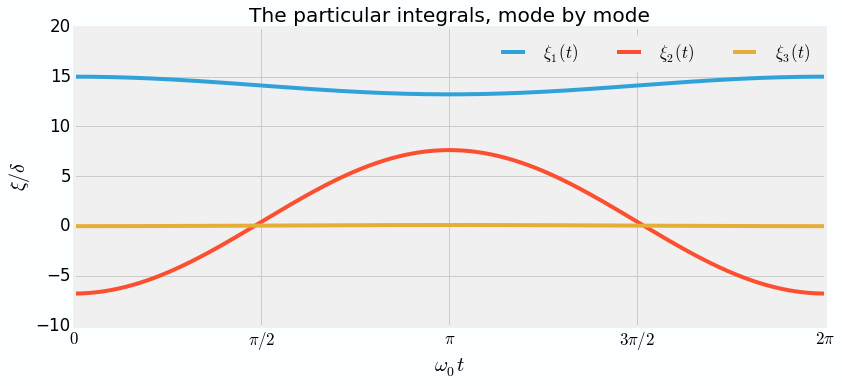

In [11]:
for i in 0, 1, 2:
    plt.plot(t1, C[i]+D[i]*np.cos(t1), label=r'$\xi_%d(t)$'%(i+1))
    
plt.xlabel(r'$\omega_0t$', size=20)
plt.ylabel(r'$\xi/\delta$', size=20)
plt.legend(loc=0, ncol=3)
plt.xlim((0,2*pi))
plt.xticks((0,pi/2,pi,pi*1.5,2*pi),
           (r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'))
plt.title('The particular integrals, mode by mode')
plt.show()

## Modal Responses

With respect to the forced phase, the modal responses have the generic expression

\begin{align}
   q_i(t) & = A_i\cos(\Lambda_i\omega_0t)
            + B_i\sin(\Lambda_i\omega_0t) + C_i + D_i\cos(\omega_0t),\\
   \dot q_i(t) & = \Lambda_i\omega_0 \left(
       B_i\cos(\Lambda_i\omega_0t) - A_i\sin(\Lambda_i\omega_0t) \right) -
       \omega_0 D_i \sin(\omega_0t),
\end{align}

and we can write, for the specified initial rest conditions, that

$$ A_i + C_i + D_i = 0, \qquad B_i = 0$$

hence

\begin{align}
   q_i(t) & = (1-\cos(\Lambda_i\omega_0t)) C_i
            + (\cos(\omega_0t) - \cos(\Lambda_i\omega_0t)) D_i,\\
   {\dot q}_i(t) & = \Lambda_i\omega_0 (C_i+D_i) \sin(\Lambda_i\omega_0t) -
                   \omega_0 D_i \sin(\omega_0t).
\end{align}

In [12]:
A = -C - D
L = np.sqrt(evals)

t1 = np.linspace(0,2*pi,601)
q1 = [A[i]*np.cos(L[i]*t1) + C[i] + D[i]*np.cos(t1) for i in (0,1,2)]

display(Latex(r'\begin{align}' +
              r'\\'.join(r"""
\frac{q_%d(t)}\delta &= %+g %+g \cos(\omega_0 t) %+g \cos(%g\omega_0t), &&
\text{for } 0 \le \omega_0 t \le 2\pi.
                          """ % (i+1,C[i],D[i],A[i],L[i]) for i in range(3)) +
              r'\end{align}'))

<IPython.core.display.Latex object>

With respect to the free response phase, $2\pi \le \omega_0t$, writing

$$
  q^*_i(t) = A^*_i \cos(\Lambda_i\omega_0t) + B^*_i \sin(\Lambda_i\omega_0t)
$$

imposing the continuity of modal displacements and modal velocities we have

\begin{align}
    q_i(t_1) &= A^*_i \cos(\Lambda_i\omega_0t_1) + B^*_i \sin(\Lambda_i\omega_0t_1)\\
    \dot q_i(t_1) &= \big(
      B^*_i \cos(\Lambda_i\omega_0t_1) - A^*_i \sin(\Lambda_i\omega_0t_1)
    \big) \Lambda_i\omega_0
\end{align}

that gives

\begin{align}
    A^*_i &= \frac{q_i(t_1)\Lambda_i\omega_0\cos(\Lambda_i\omega_0t_1) - \dot q_i(t_1)\sin(\Lambda_i\omega_0t_1)}{\Lambda_i\omega_0} \\
    B^*_i &= \frac{q_i(t_1)\Lambda_i\omega_0\sin(\Lambda_i\omega_0t_1) + \dot q_i(t_1)\cos(\Lambda_i\omega_0t_1)}{\Lambda_i\omega_0} \\    
\end{align}


In [13]:
ct1 = np.cos(L*2*pi)
st1 = np.sin(L*2*pi)

q0t1 = C + D*np.cos(2*pi) + A*ct1
q1t1 =   - D*np.sin(2*pi) - A*st1*L

print(q0t1, q1t1)
As = (q0t1*L*ct1 - q1t1*st1)/L
Bs = (q0t1*L*st1 + q1t1*ct1)/L

print(As*ct1+Bs*st1, L*(Bs*ct1-As*st1))
t2 = np.linspace(2*pi, 4*pi, 601)
q2 = [As[i]*np.cos(L[i]*t2) + Bs[i]*np.sin(L[i]*t2) for i in (0,1,2)]

display(Latex(r'\begin{align}' +
              r'\\'.join(r"""
\frac{q^*_%d(t)}\delta &= %+g \cos(%g\omega_0 t) %+g \sin(%g\omega_0t), &&
\text{for } 2\pi \le \omega_0 t.
                          """ % (i+1, As[i], L[i], Bs[i], L[i]) for i in range(3)) +
              r'\end{align}'))

[ 14.36696893  -0.12932443  -0.01834132] [ 3.64626164 -1.35830012  0.0017737 ]
[ 14.36696893  -0.12932443  -0.01834132] [ 3.64626164 -1.35830012  0.0017737 ]


<IPython.core.display.Latex object>

### Plotting the modal responses

Let's plot the modal responses, first one by one, to appreciate the details of the single modal response

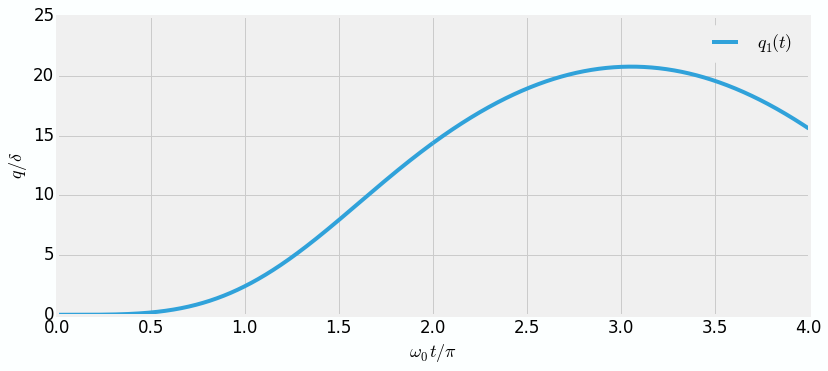

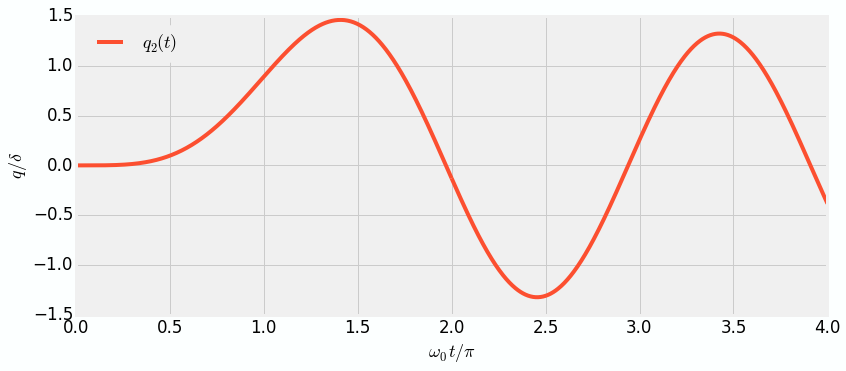

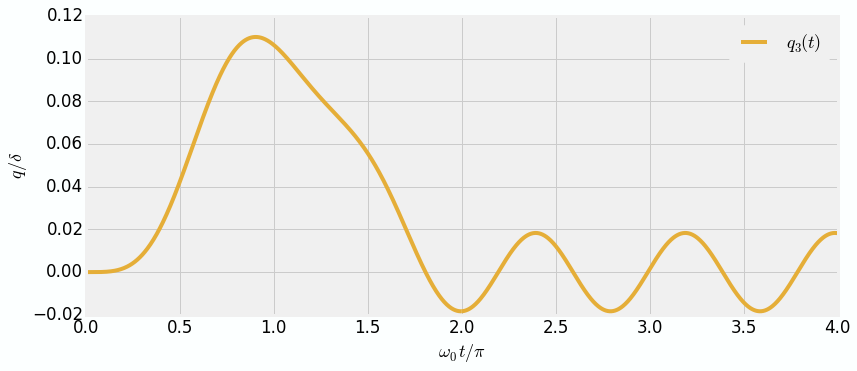

In [16]:
for i in (0,1,2): 
    plt.plot(t1/pi,q1[i], color=l_colors[i],
             label='$q_{%d}(t)$'%(i+1))
    plt.plot(t2/pi,q2[i], color=l_colors[i])
    plt.xlabel(r'$\omega_0t/\pi$', fontsize=18)
    plt.ylabel(r'$q/\delta$', fontsize=18)
    plt.legend(loc=0, fontsize=18)
    plt.show()

then all of them in a single plot, to appreciate the relative magnutudes of the different modal responses

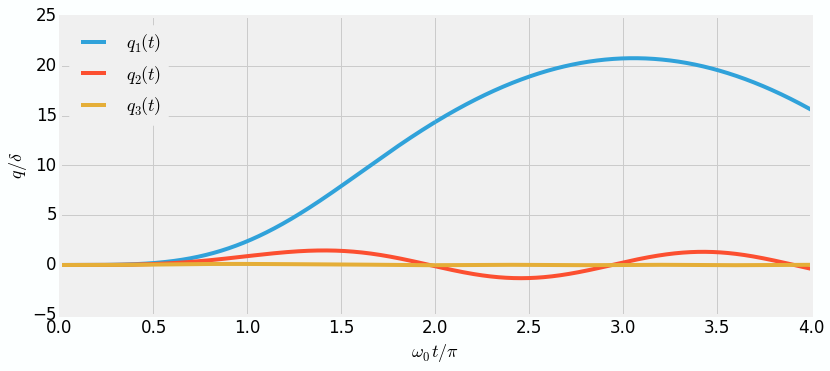

In [14]:
for i in (0,1,2): 
    plt.plot(t1/pi,q1[i], color=l_colors[i],
             label='$q_{%d}(t)$'%(i+1))
    plt.plot(t2/pi,q2[i], color=l_colors[i])
    
plt.xlabel(r'$\omega_0t/\pi$', fontsize=18)
plt.ylabel(r'$q/\delta$', fontsize=18)
plt.legend(loc=0, fontsize=18)
plt.show()

## System Response in Natural Coordinates

We stack together the times and the modal responses for the forced and the free phases in two single vectors, then we compute the nodal response by premultiplying the modal response by the eigenvectors matrix

In [ ]:
t = np.hstack((t1, t2))
q = np.hstack((q1, q2))
x = np.dot(evecs, q)

### Plotting of the natural coordinate responses

All of them in a single plot, as they have the same order of magnitude

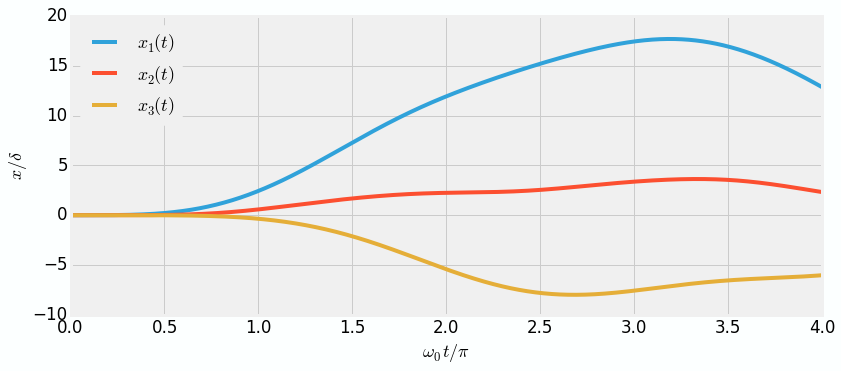

In [15]:
for i in (0,1,2): plt.plot(t/pi,x[i],
                           label='$x_{%d}(t)$'%(i+1))
    
plt.xlabel(r'$\omega_0t/\pi$', fontsize=18)
plt.ylabel(r'$x/\delta$', fontsize=18)
plt.legend(loc=0, fontsize=18)
plt.show()

## Final Displacements and Final Velocities

Say that $t_2=4\pi/\omega_0$, we compute the vectors of sines and cosines with different frequencies at $t_2$, then we compute the modal displacements and velocities (note that the dimensional velocities are these adimensional velocities multiplied by $\omega_0\,\delta$) and eventually we compute the nodal quantities by premultiplication by the eigenvectors matrix.

In [64]:
ct2 = np.cos(L*4*pi)
st2 = np.sin(L*4*pi)

q0t2 = As*ct2+Bs*st2 ; q1t2 = L*(Bs*ct2-As*st2)

display(Latex(r"$\boldsymbol x(t_2) = \{"+
              ",".join("%10.6f"%x for x in np.dot(evecs,q0t2))+
              "\}\,\delta$"))
display(Latex(r"$\boldsymbol v(t_2) = \{"+
              ",".join("%10.6f"%x for x in np.dot(evecs,q1t2))+
              "\}\,\omega_0\,\delta$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>